In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Filters

In [2]:
# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")

# Zero Padding

In [3]:
#Zero padding of numpy array
def zero_padding(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad = ((p, p), (q, q))
    padded_img = np.pad(img, pad, mode='constant', constant_values=0)
    return padded_img

# Convolution

In [4]:
def convolution(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1]//2
    
    padded_img = zero_padding(img, kernel)
    
    P = np.empty(img.shape, dtype=np.float64)
            
    for i in np.arange(p, m+p):
        for j in np.arange(q, n+q):
            roi = padded_img[i - p:i + p + 1, j - q:j + q + 1]
            P[i - p, j - q] = (roi*kernel).sum()
    return P

In [5]:
def convolve(img, kernel):
    result_img = convolution(img, kernel)
    
    if (result_img.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        result_img = result_img + abs(np.amin(g))
        result_img = result_img / np.amax(g)
        result_img = (result_img*255.0)
        
    return result_img


# Read Image

In [6]:
img = cv2.imread('D:\ASSIGNMENT\CV\Assignment 2/cat.jpg')

In [7]:
img_cpy = img.copy() # copying image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # grayscaling (0-1)

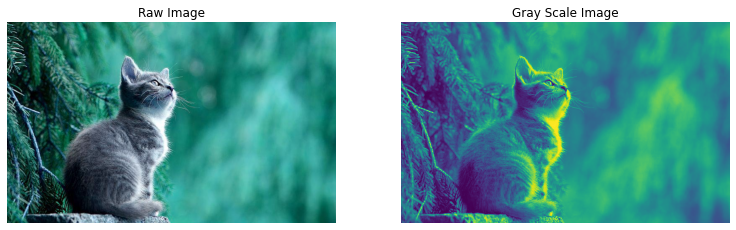

In [8]:
if img is None:
    print('Invalid image')
else:
    plt.figure(figsize=(20, 20))
    plt.subplot(131), plt.imshow(img_cpy)
    plt.title("Raw Image")
    plt.axis('off')
    plt.subplot(132), plt.imshow(img_gray)
    plt.title("Gray Scale Image")
    plt.axis('off')
    plt.show()

# Corner Detection

In [9]:
dx = convolve(img_gray, SOBEL_X) # convolving with sobel filter on X-axis
dy = convolve(img_gray, SOBEL_Y) # convolving with sobel filter on Y-axis

# Sobel Filtered Images Visualization

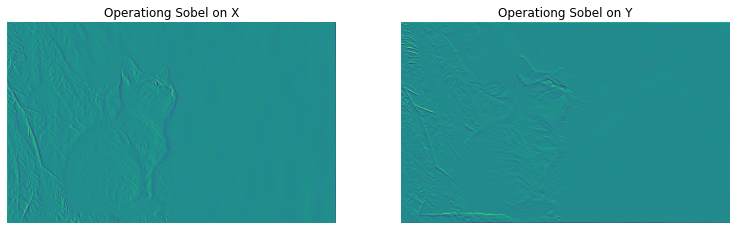

In [10]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(dx)
plt.title("Operationg Sobel on X")
plt.axis('off')
plt.subplot(132), plt.imshow(dy)
plt.title("Operationg Sobel on Y")
plt.axis('off')
plt.show()

In [11]:
# square of derivatives
dx2 = np.square(dx)
dy2 = np.square(dy)
dxdy = dx*dy #cross filtering

# Square of Sobel Filtered Images Visualization

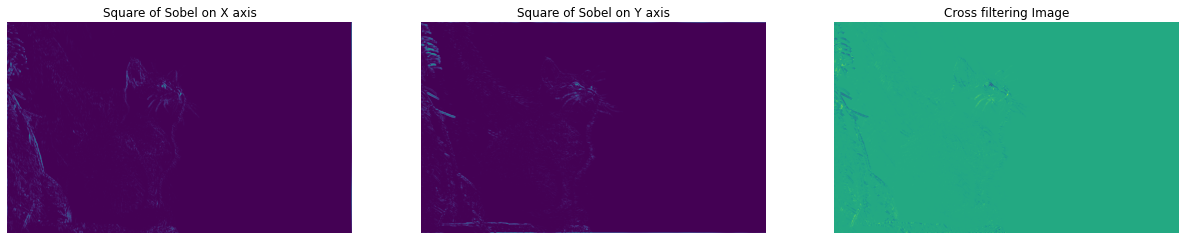

In [12]:
plt.figure(figsize=(21, 21))
plt.subplot(131), plt.imshow(dx2)
plt.title("Square of Sobel on X axis"), plt.axis('off')
plt.subplot(132), plt.imshow(dy2)
plt.title("Square of Sobel on Y axis"), plt.axis('off')
plt.subplot(133), plt.imshow(dxdy)
plt.title("Cross filtering Image"), plt.axis('off')
plt.show()

In [13]:
# gauss filter for all directions (x,y,cross axis)
g_dx2 = convolve(dx2, GAUSS)
g_dy2 = convolve(dy2, GAUSS)
g_dxdy = convolve(dxdy, GAUSS)

# Gauss Filtered Images Visualization

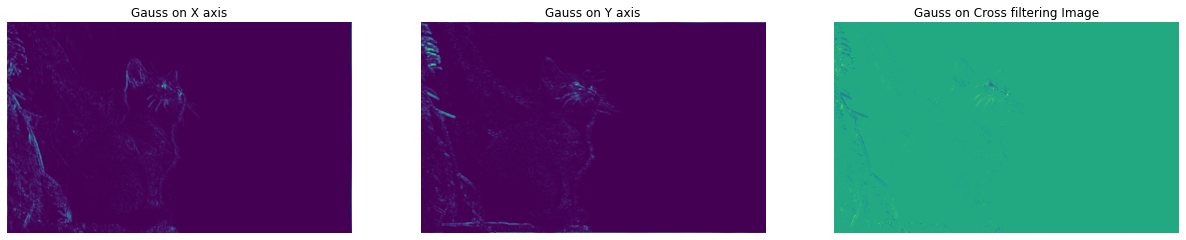

In [14]:
plt.figure(figsize=(21, 21))
plt.subplot(131), plt.imshow(g_dx2)
plt.title("Gauss on X axis"), plt.axis('off')
plt.subplot(132), plt.imshow(g_dy2)
plt.title("Gauss on Y axis"), plt.axis('off')
plt.subplot(133), plt.imshow(dxdy)
plt.title("Gauss on Cross filtering Image"), plt.axis('off')
plt.show()

In [15]:
det = (g_dx2*g_dy2 - np.square(g_dxdy))
trace = (g_dx2 + g_dy2)

In [16]:
# Harris Function
k = 0.05
harris = det - k*np.square(trace)  # r(harris) = det - k*(trace**2)

In [17]:
# Normalizing inside (0-1)
cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

array([[0.40442179, 0.40479057, 0.40410521, ..., 0.36838889, 0.51479755,
        0.5115159 ],
       [0.41094134, 0.40938331, 0.4036189 , ..., 0.39517884, 0.51706281,
        0.51291761],
       [0.46939454, 0.4738526 , 0.38878565, ..., 0.40413058, 0.39489317,
        0.36595611],
       ...,
       [0.40380416, 0.40376217, 0.40391657, ..., 0.40413065, 0.40333411,
        0.40087466],
       [0.40474184, 0.40620133, 0.40742556, ..., 0.40338717, 0.41366476,
        0.41328794],
       [0.40461957, 0.40541096, 0.40581799, ..., 0.40112881, 0.41336291,
        0.41307577]])

In [18]:
img_with_corners = np.copy(img)
img_copy_for_edges = np.copy(img)
threshold = 0.42
for rowindex, response in enumerate(harris):
    for colindex, r in enumerate(response):
        if r > threshold:
            img_with_corners[rowindex, colindex] = [255,0,0]

# Raw Image and Harris Corner Output Visualization

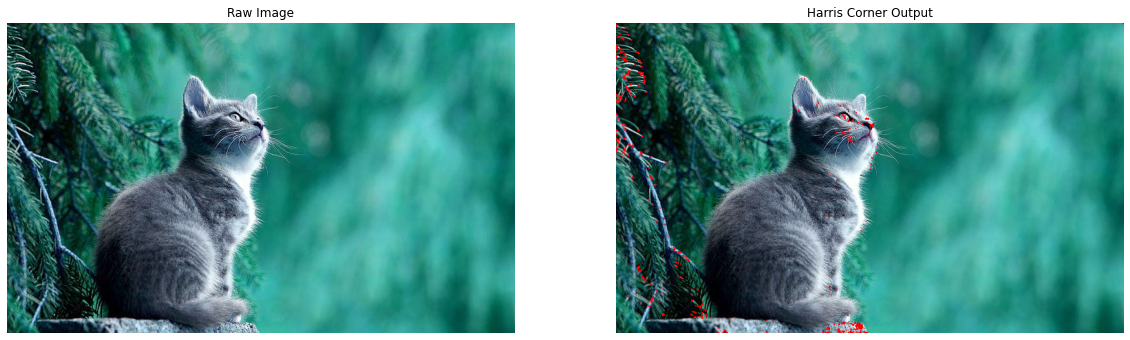

In [19]:
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_cpy)
plt.title("Raw Image")
plt.axis('off')
plt.subplot(122), plt.imshow(img_with_corners)
plt.title("Harris Corner Output")
plt.axis('off')
plt.show()